In [2]:
# First of all we have to import the library 
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Diwali Sales Data 

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='windows-1252')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Step 2 - Cleaning Data


Chacking the information of the data

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


There are some columns that is empty, so we have to delete that column

In [6]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


Then we check is there any data is missing. If it is missing then we delete that row 

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

we can see that amount has 12 null values so we have to delete that rows

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.shape

(11239, 13)

## Step 3 - data visualization and analysis insights

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


On the Basis of Gender

### On the basis of Gender

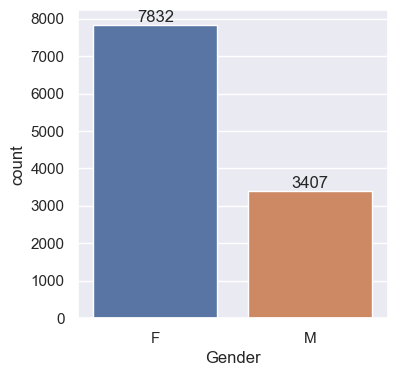

In [14]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
sales_gen = df.groupby(['Gender'], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

<Axes: xlabel='Gender', ylabel='Amount'>

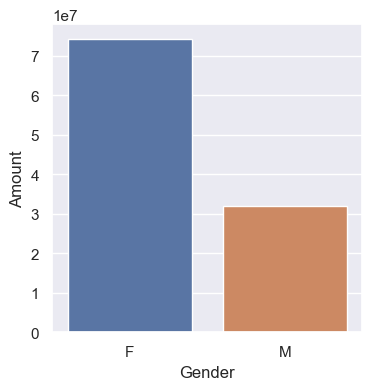

In [16]:
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

From these graph we can see that most of the buyers are female even the purchasing power of female is grater then male.

### On the Basis of Age Group

In [17]:
sns.set(rc={'figure.figsize':(7,4)})

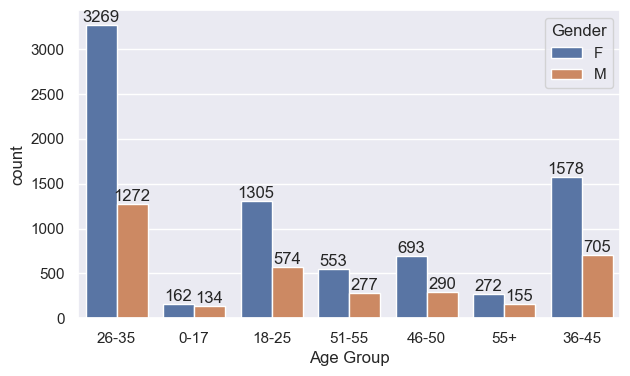

In [18]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

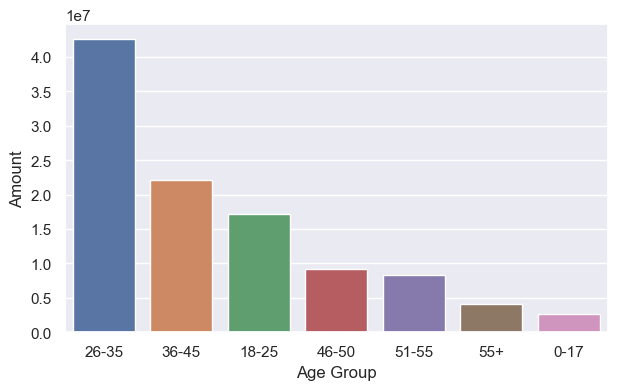

In [19]:
sales_Age = df.groupby(['Age Group'], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_Age)

Fom the above graphs we can see that the most of the buyers are in the age between 26 to 35 are females.

### On the basis of state

In [20]:
sns.set(rc={'figure.figsize':(20,5)})

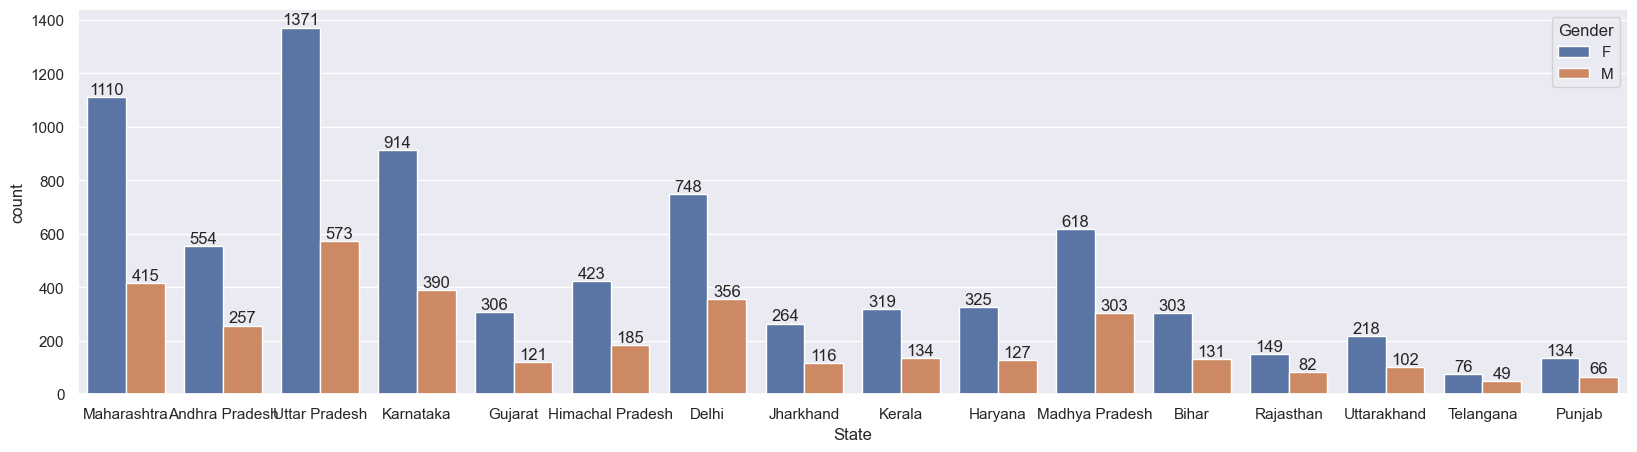

In [21]:
ax = sns.countplot(x = 'State', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

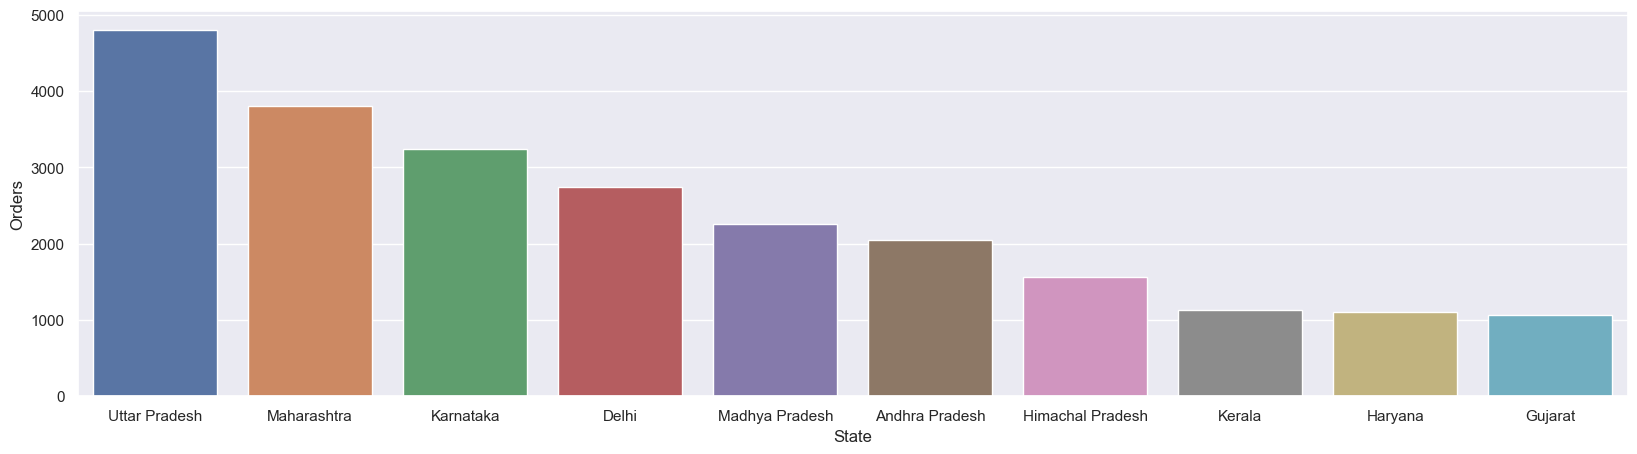

In [22]:
sales_state = df.groupby(['State'], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

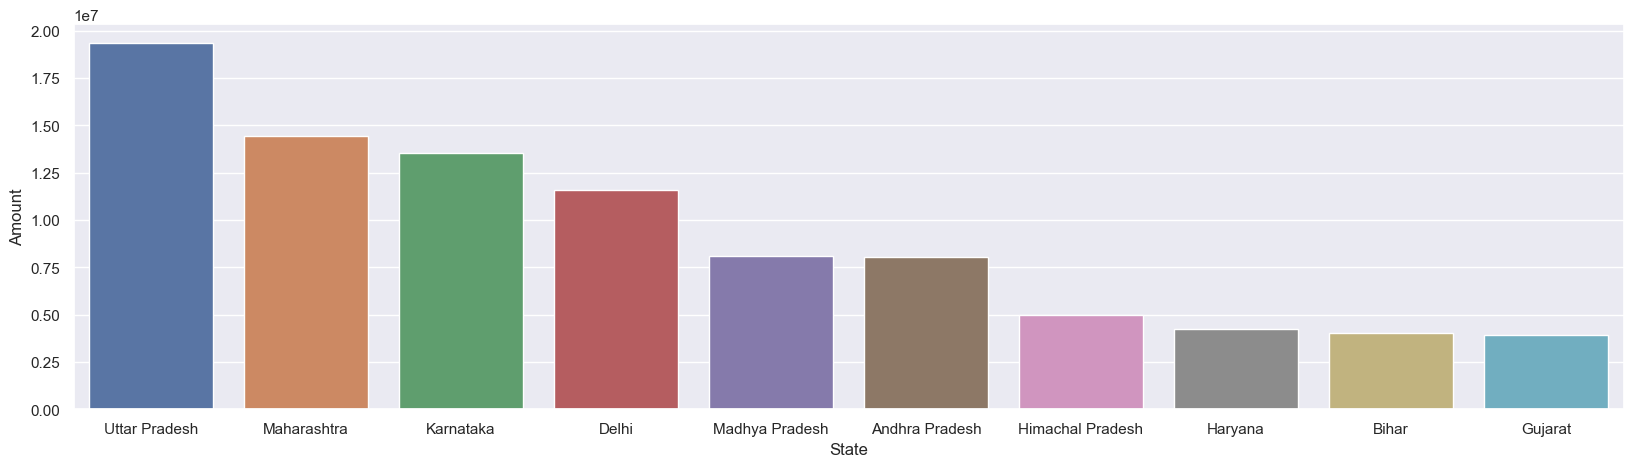

In [23]:
sales_state = df.groupby(['State'], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

From above graphs we can see that the most of the orders are from Uttar Pradesh, Maharashtra, katanataka and delhi.

### On the basis of Marital_Status

In [24]:
sns.set(rc={'figure.figsize':(4,4)})

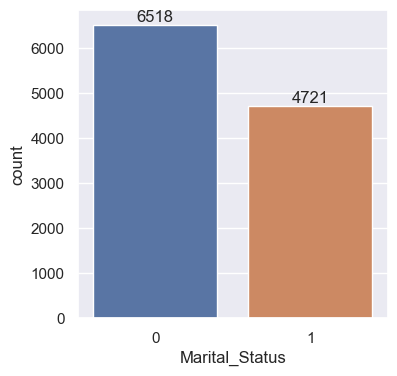

In [25]:

ax = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

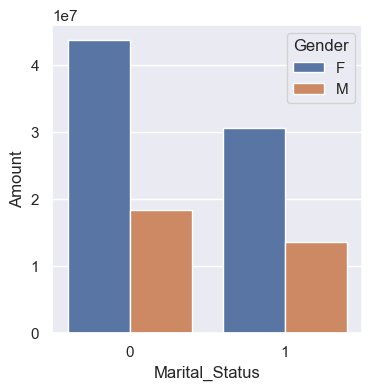

In [26]:
sales_Marital_Status = df.groupby(['Marital_Status', 'Gender'], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_Marital_Status, hue = 'Gender')

From the above graphs we can see that most of the buyers are maried(Women) and even the purchasing power women are grater then men 

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### On the basis of Occupation

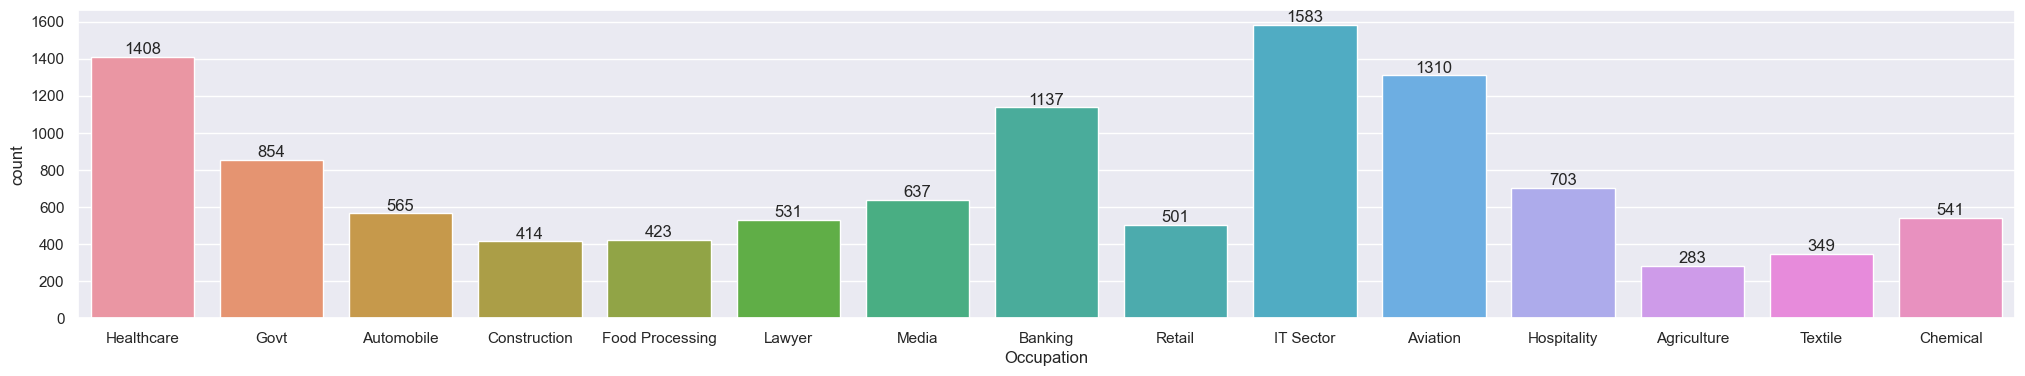

In [28]:
sns.set(rc={'figure.figsize':(25,4)})
ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

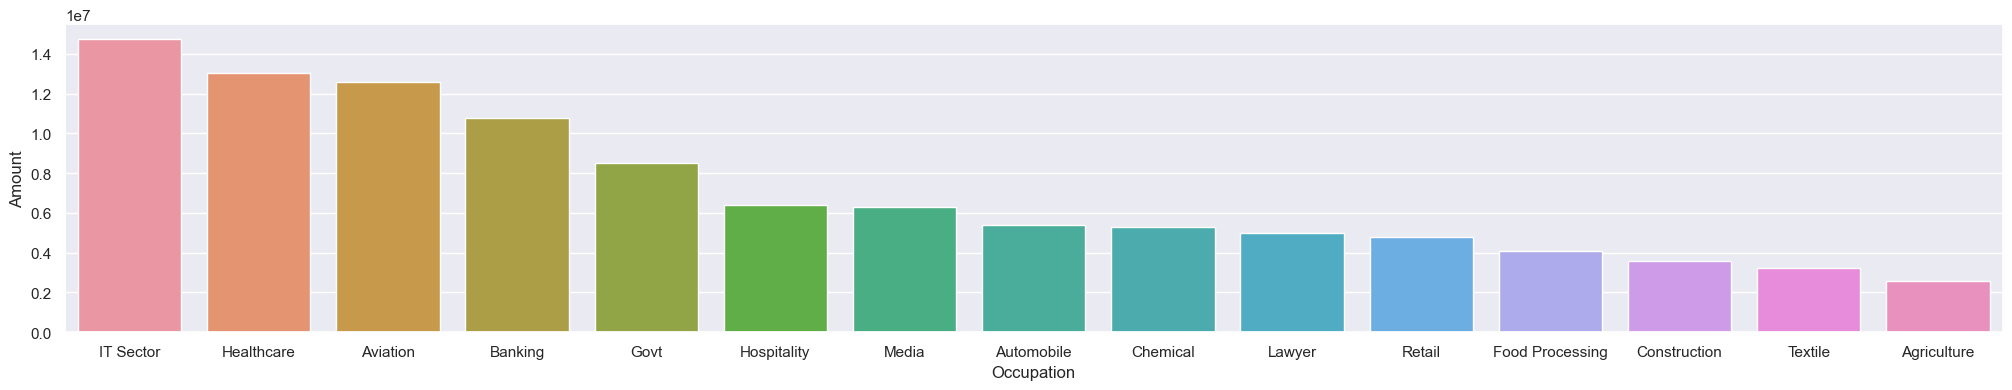

In [29]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

From the above graphs we can see that most of the buyers are from IT sectior, Healthcare Aviation, Banking and Government

### On the basis of Product_Category

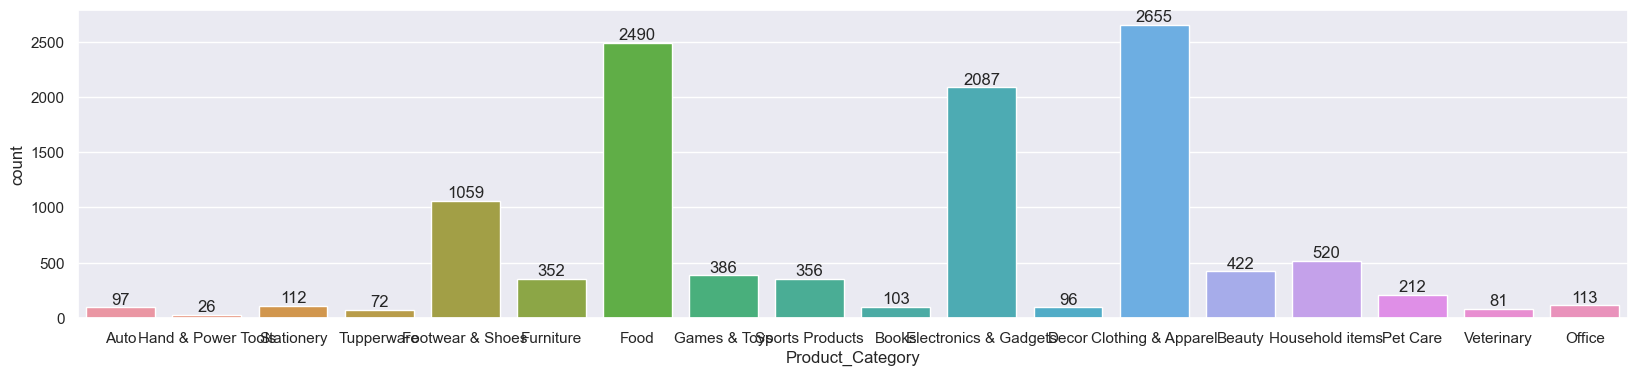

In [30]:
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

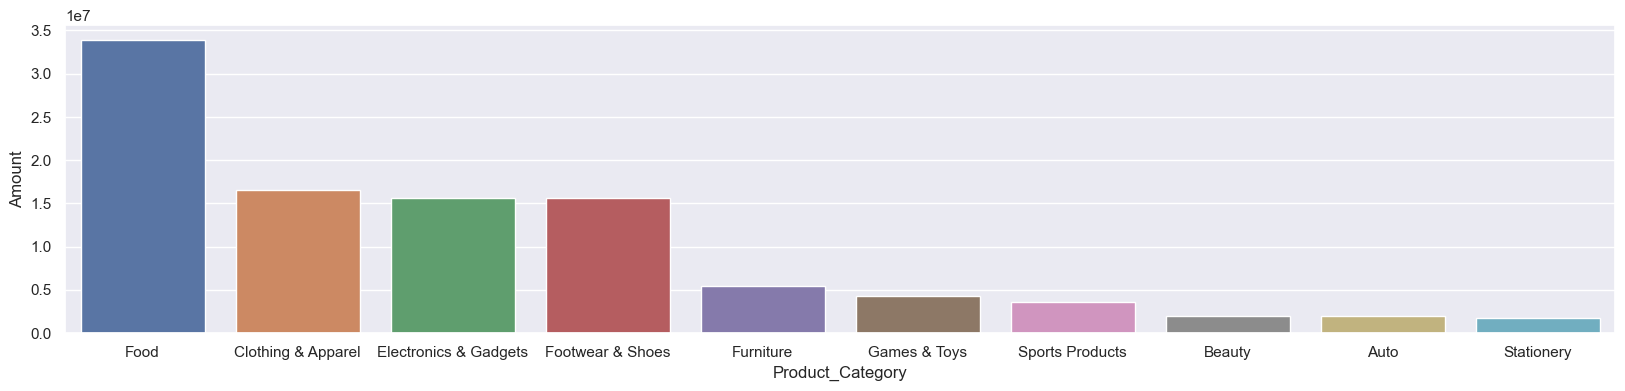

In [31]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(10)
sns.barplot(x='Product_Category', y='Amount', data= sales_product)

From the above graphs we can see that most of the sold product are from Food, Clothing & Apparel , Electronics & gadgets and Footwares

### On the basis of Product id

<Axes: xlabel='Product_ID', ylabel='Orders'>

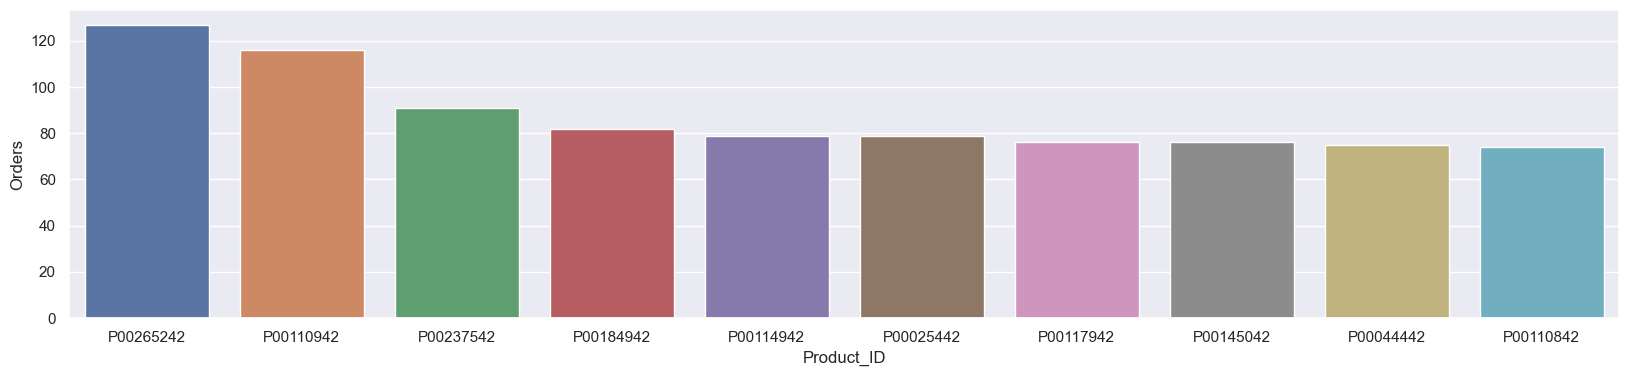

In [32]:
sales_Product_ID = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(x='Product_ID', y='Orders',data=sales_Product_ID )

## Conclusion

Married women age group 26-35 year from UP, Mahrashtra and karnataka working in IT, Healthcare and Avaition are more likely buy product from Food, Cloathing and electronic categorys. 

# Project Learning


* Preform data cleaning and manipulation
* Preform exploratory data analysis (EDA) using pandas, matplotlib, seaborn
* Improve costumer experience by identifying potential costumers across the states, Occupation, Gender and age groups
* Improve sales by identifying most salling product categories and products, which can help to plan inventory and hence meet the demands